In [18]:
import arviz as az
import numpy as np
import pandas as pd
from scipy import stats
import pymc as pm
from matplotlib import rcParams, pyplot as plt

rcParams['figure.figsize'] = [12, 8]
rcParams['figure.dpi'] = 200

In [26]:
df = pd.read_csv('data/h1weekly.csv',
                 parse_dates=['Date'],
                 index_col='Date',
                 dtype={'IsCanceled': float})
df.index.freq = 'W-SUN'
series = pd.Series(df['IsCanceled'])

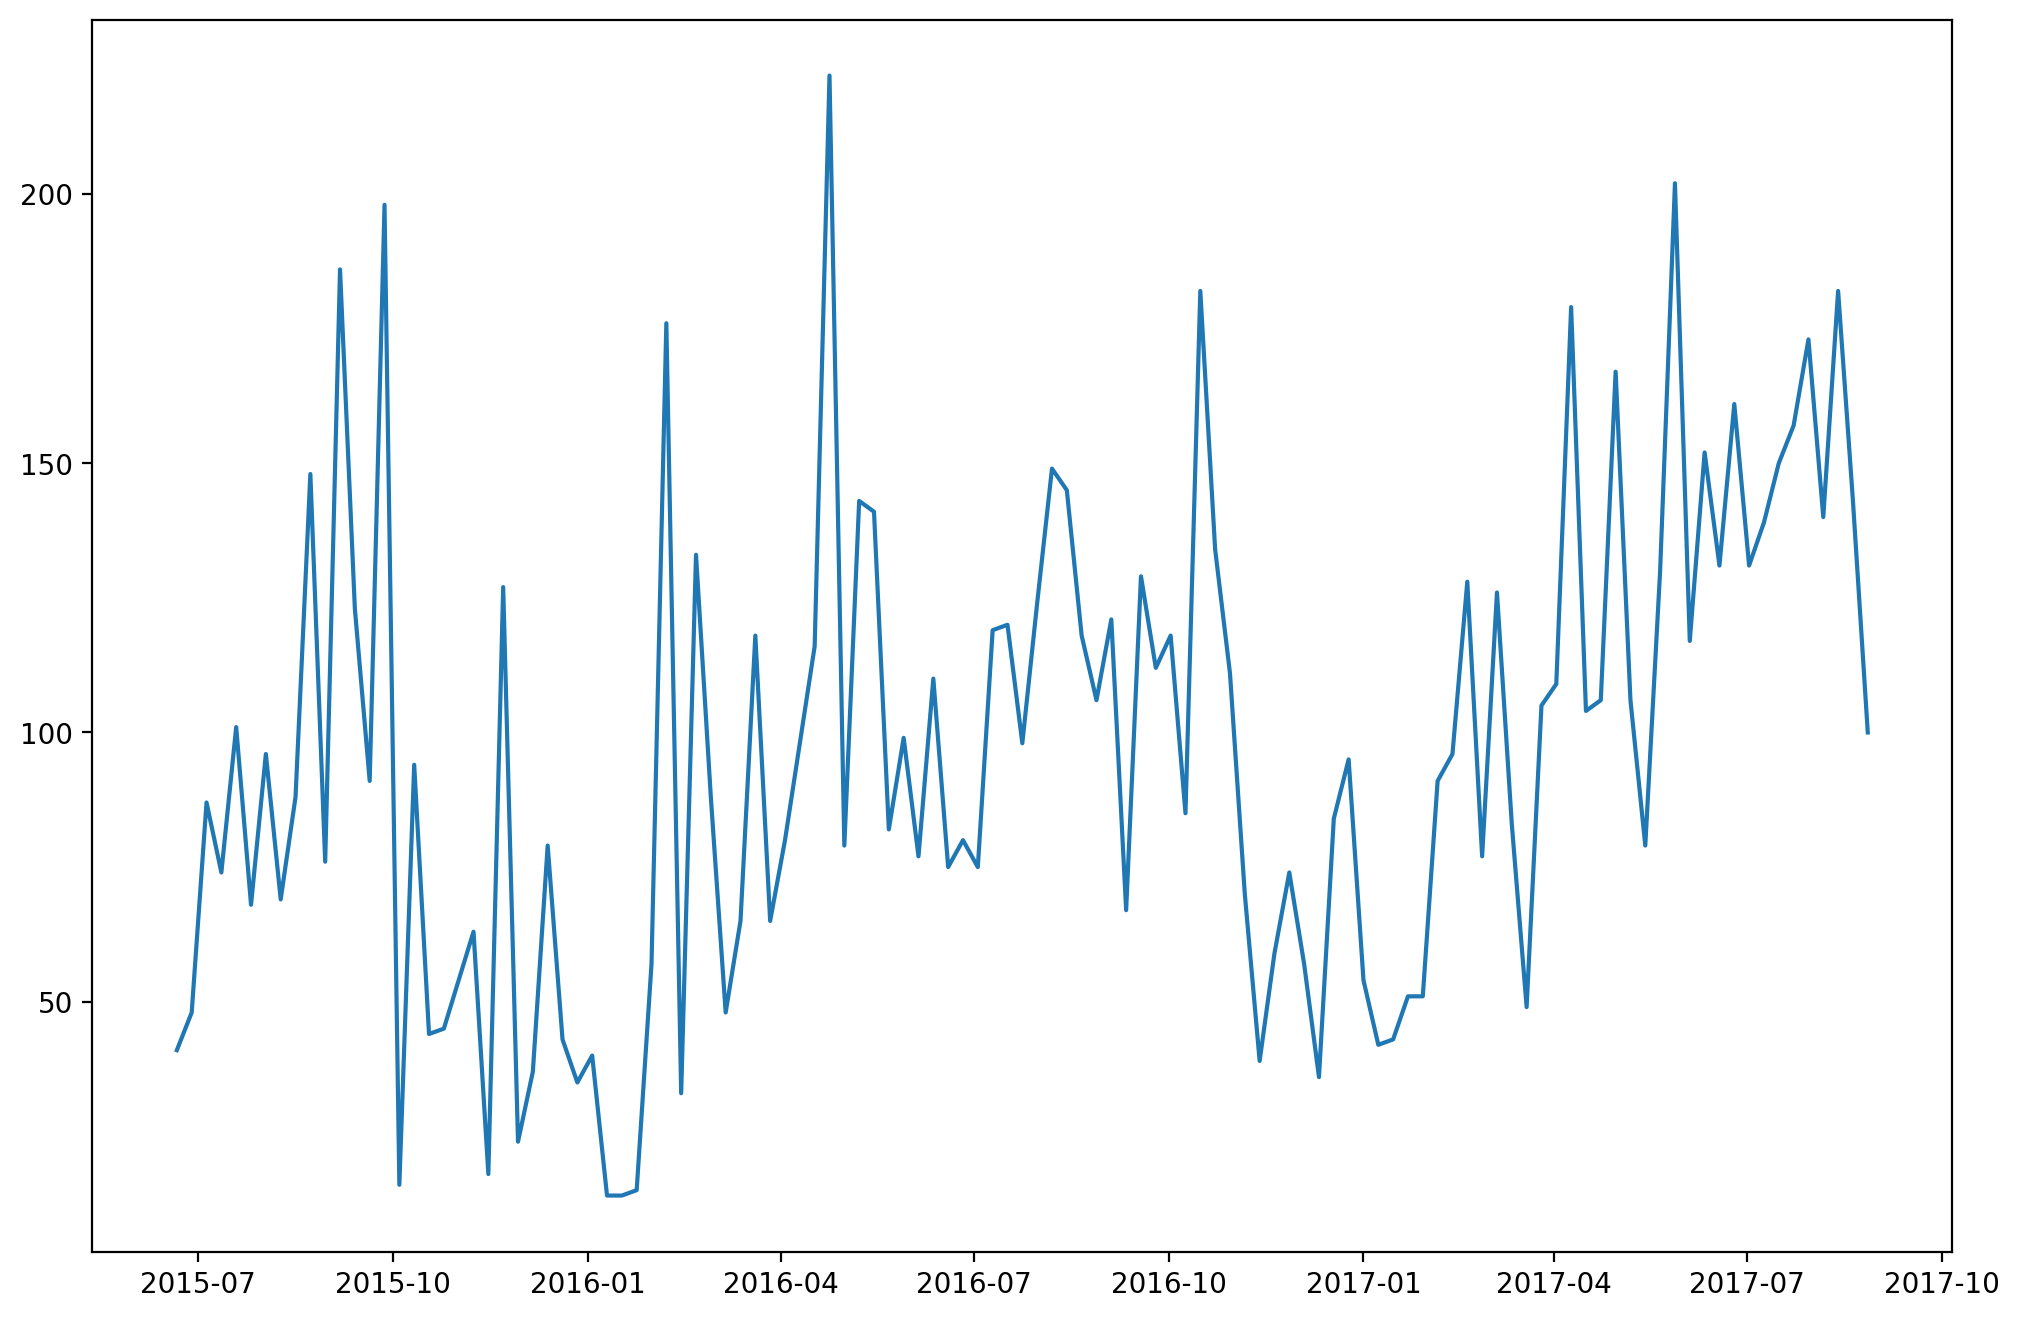

In [27]:
_ = plt.plot(series)

In [4]:
mu_prior=120
sigma_prior=10

with pm.Model() as model:
    mu = pm.Normal("mu", mu=mu_prior, sigma=sigma_prior)
    sd = pm.HalfNormal("sd", sigma=sigma_prior)
    obs = pm.TruncatedNormal("obs", mu=mu, sigma=sd, lower=0, observed=df['IsCanceled'])
    idata = pm.sample(10_000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sd]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<frozen importlib._bootstrap>:24

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.


In [5]:
with model:
    post_pred = pm.sample_posterior_predictive(idata.posterior)

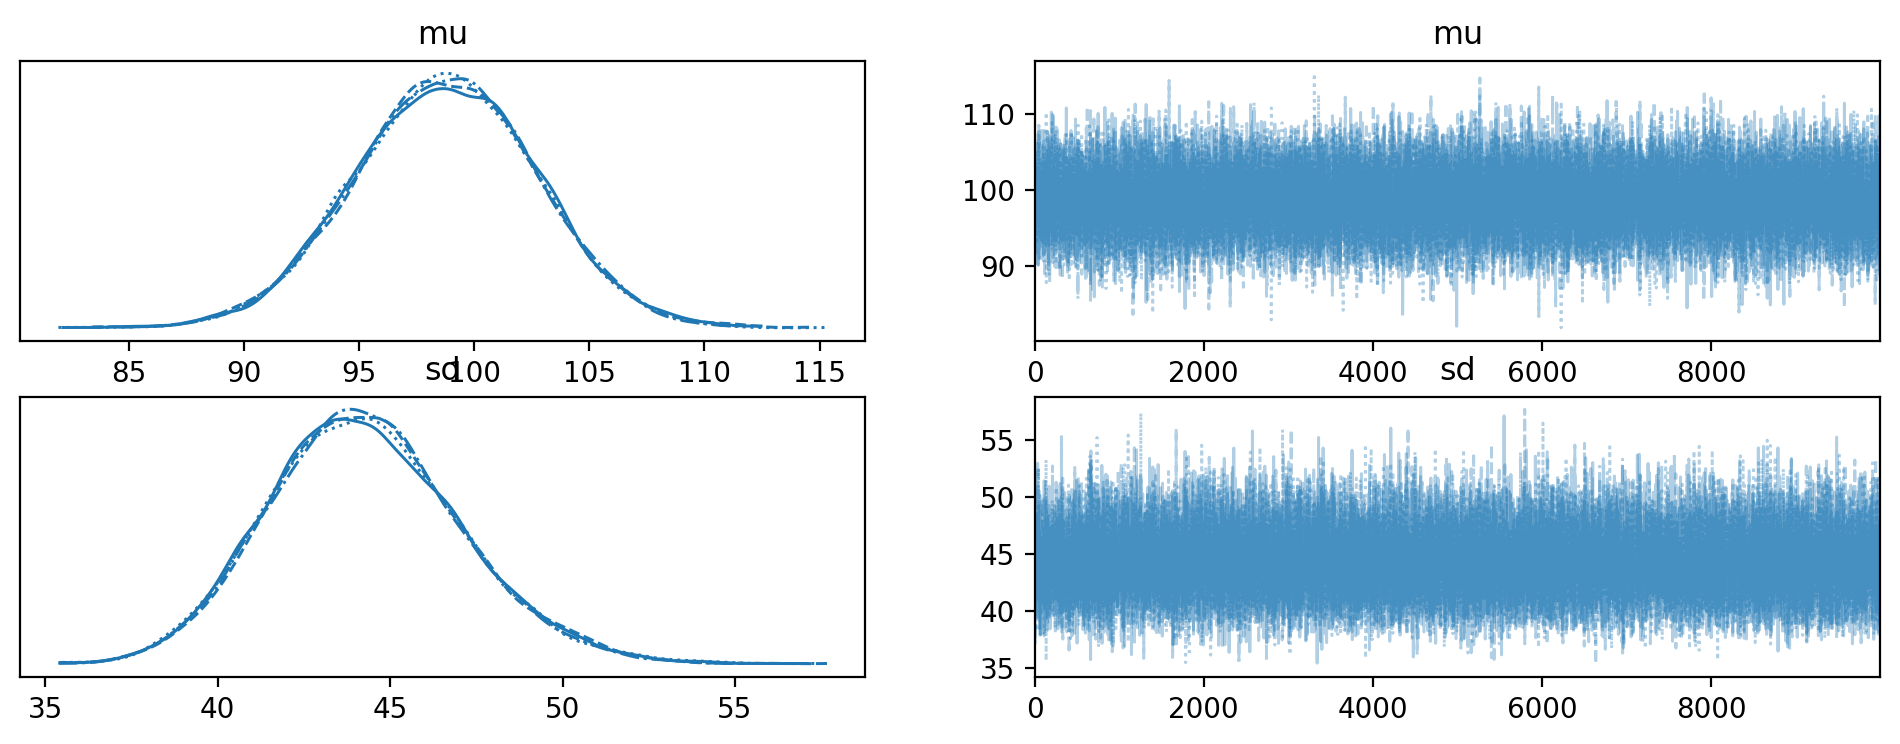

In [6]:
post_pred_az = az.from_dict(posterior_predictive=post_pred.to_dict())
az.concat([idata, post_pred_az], inplace=True)
az.plot_trace(idata);

In [7]:
print(az.summary(idata))

      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail   
mu  98.771  3.961  91.376  106.208      0.019    0.014   41436.0   28853.0  \
sd  44.273  2.791  39.055   49.551      0.014    0.010   41327.0   28354.0   

    r_hat  
mu    1.0  
sd    1.0  


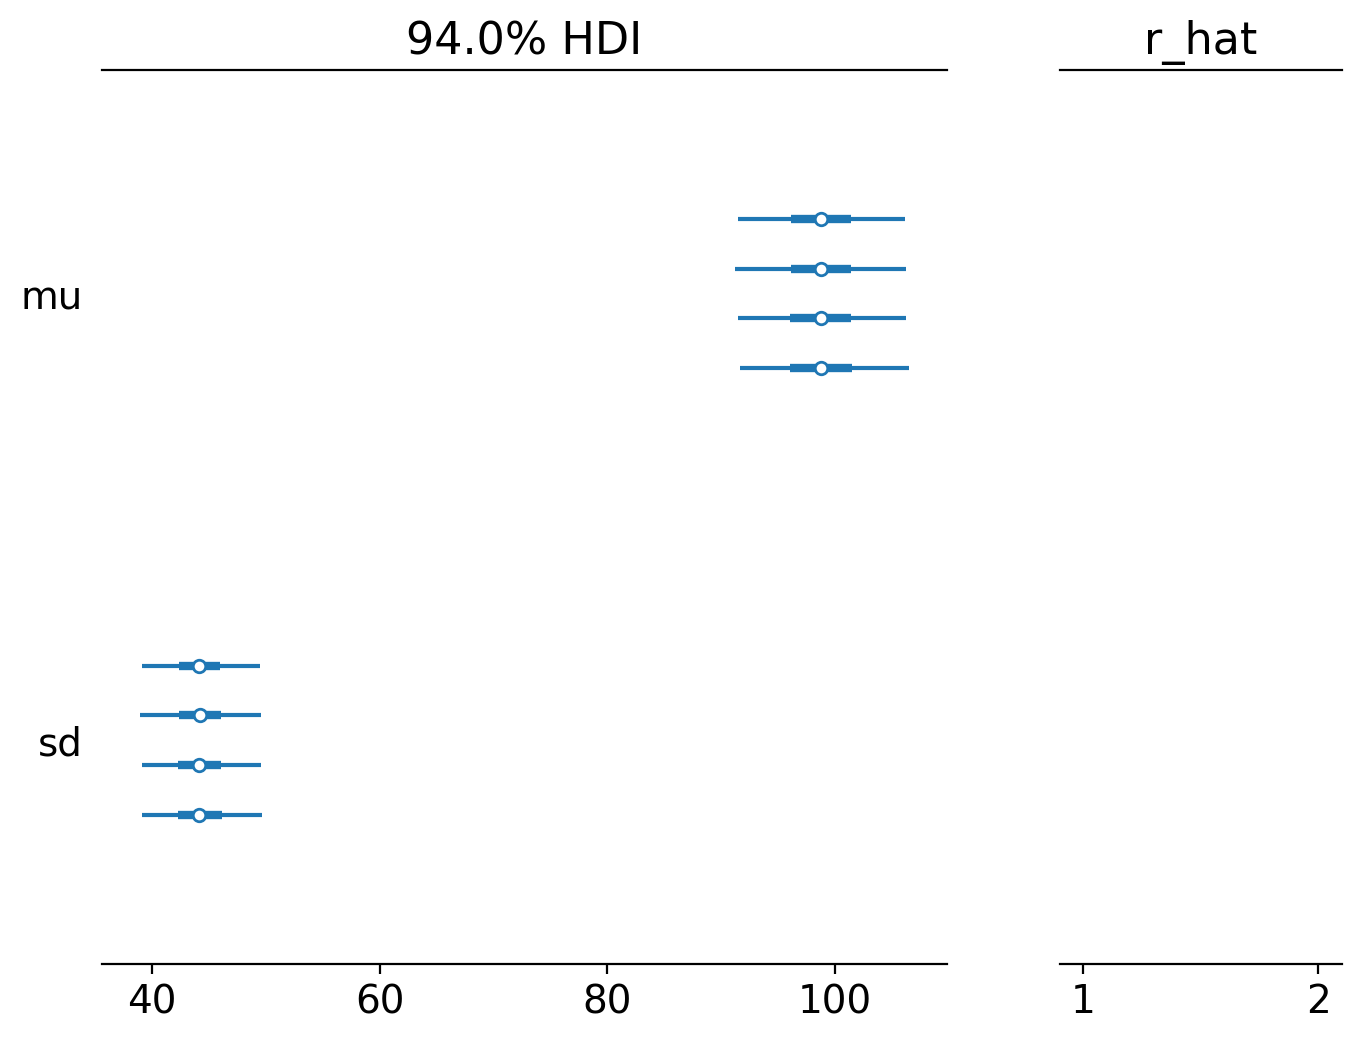

In [8]:
az.plot_forest(idata, r_hat=True);

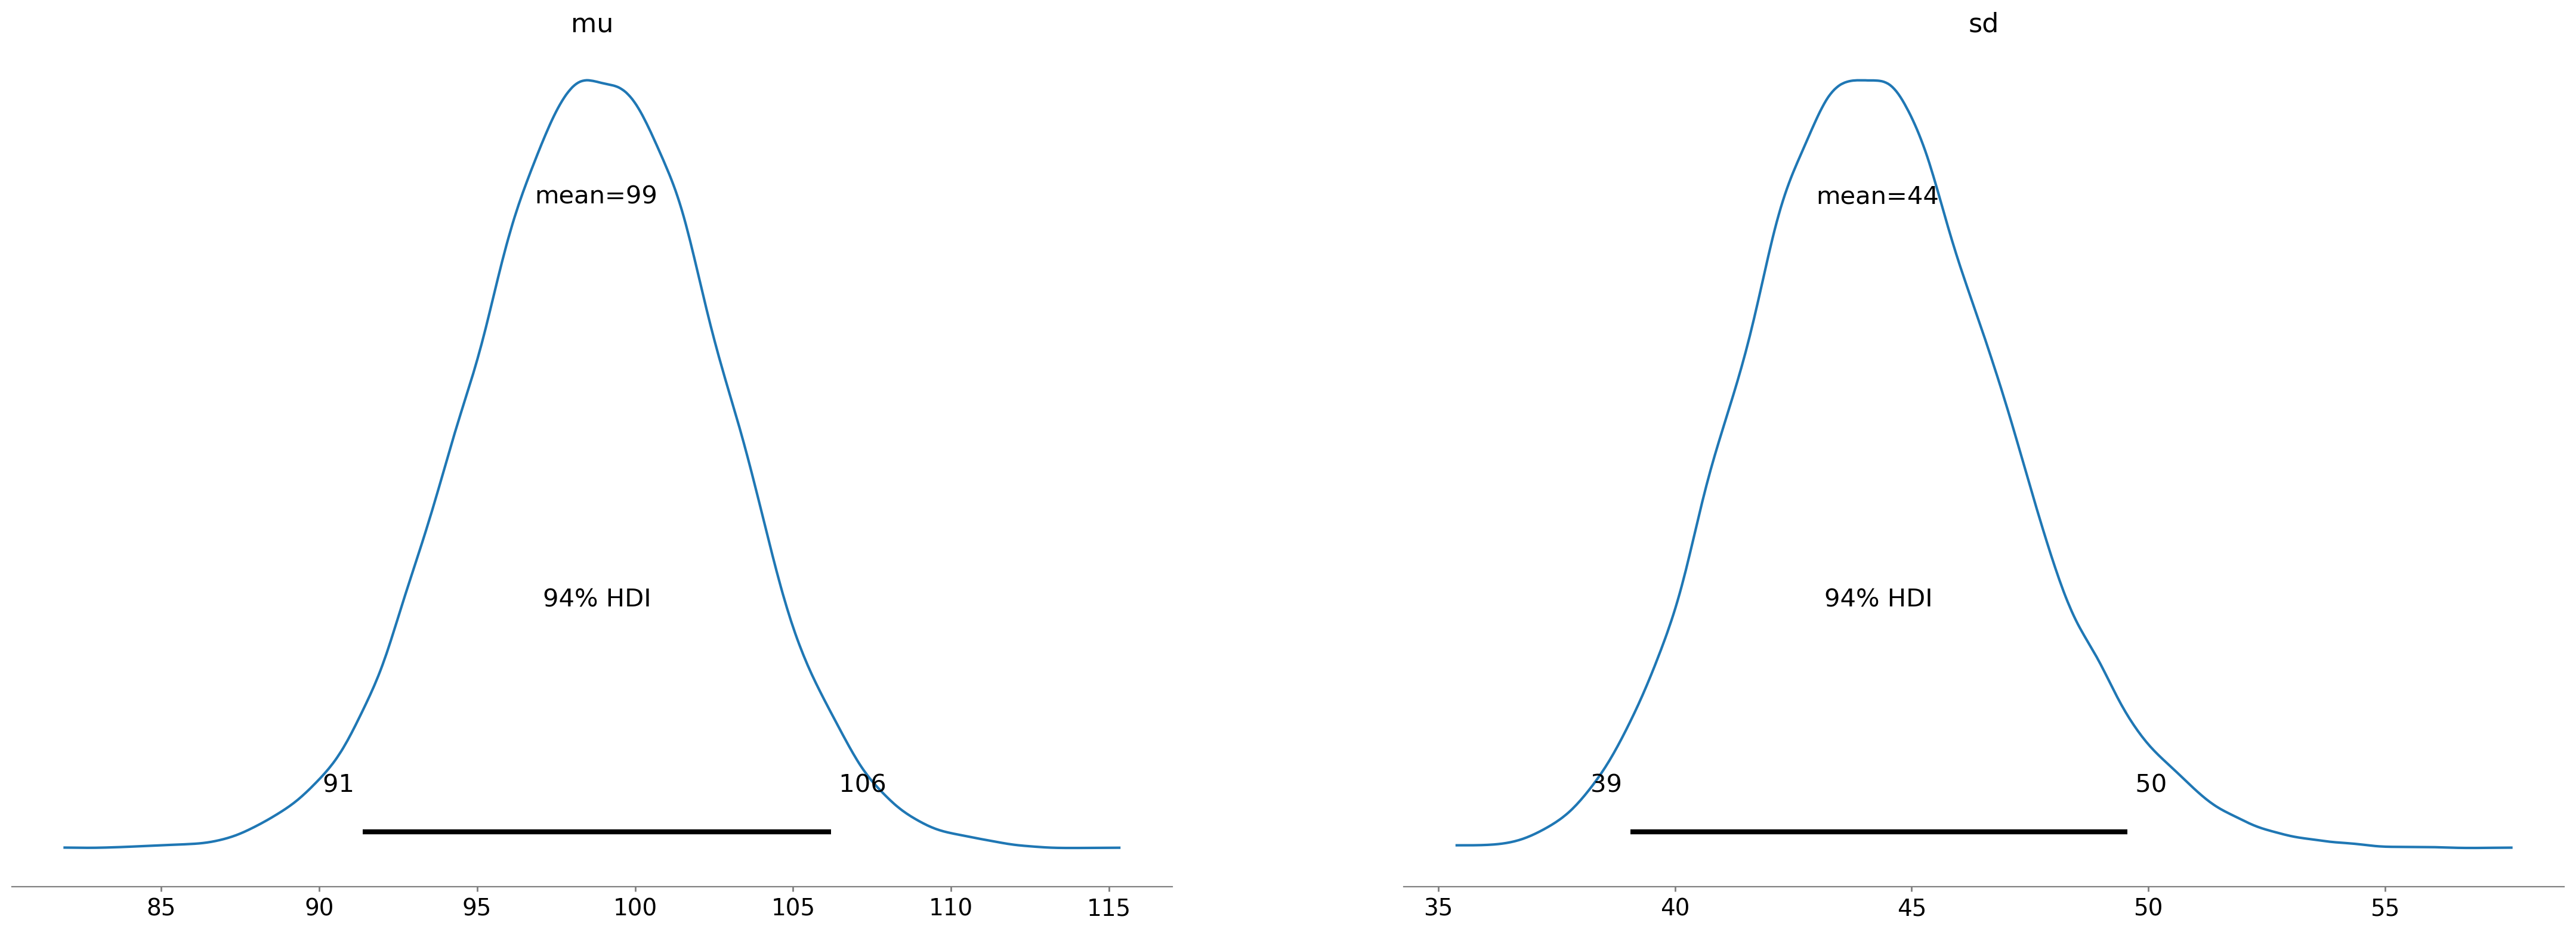

In [9]:
az.plot_posterior(idata);

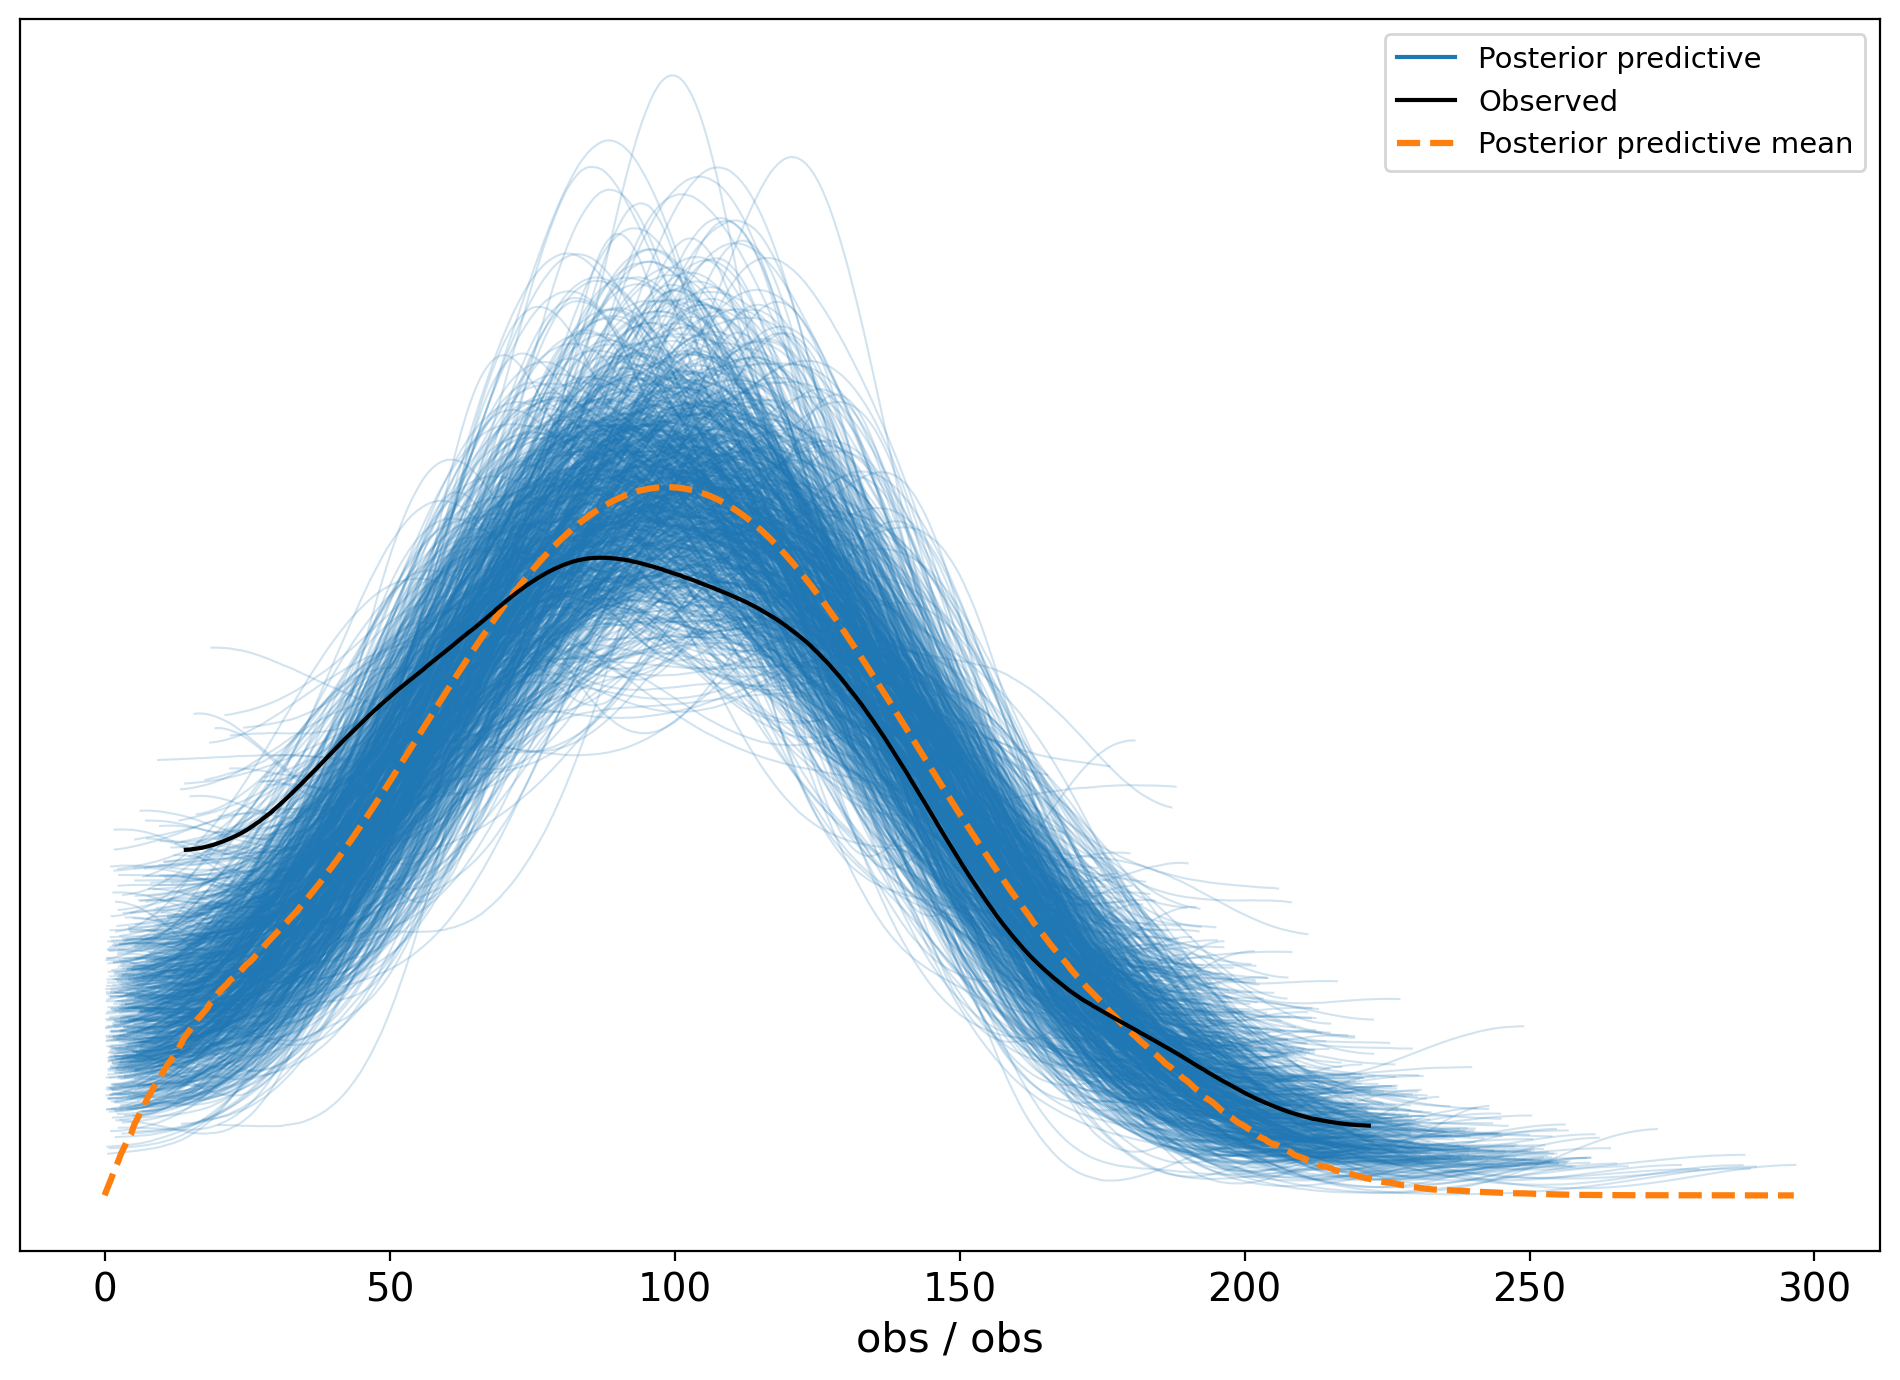

In [11]:
_ = az.plot_ppc(post_pred, num_pp_samples=1000)